## Work ON Fatal Police shooting from the Washington Post Dataset

## Introduction

The dataset, established by the Washington post, attempts to document every police-involved fatalities in the United States, filling the gap left by incomplete federal records. This dataset is updated frequently and the effort, which began in 2015, keeps thorough data of occurrences, including race, armed status, mental health status, and the circumstances surrounding each shooting. However, the dataset presents ethical and practical concerns. Ethically, it addresses sensitive topics such as issues with race and mental health difficulties, requiring meticulous handling to avoid misinterpretation or abuse. Logistically, the dataset's reliance on public sources and self-reported data raises questions about correctness and completeness. Furthermore, the dataset's representation of deeply tragic events necessitates rigor and respect,ensuring that conclusions drawn are accurates. In this project I will use the second version of this dataset [fatal-police-shootings-data.csv](https://github.com/washingtonpost/data-police-shootings/blob/master/v2/fatal-police-shootings-data.csv) to investigate the 9555 victims of police fatal shooting that the Washington Post currently has available. The dataset is freely available on the Washington Post GitHub page at this link: [fatal police shootings]( https://github.com/washingtonpost/data-police-shootings/tree/master )

In this notebook I will look into questions about the victims and the dataset. Are there any racial group more represented than others in these fatal police altercations? Is there a relationship between the gender and age of the victim and them fleeing during a police altercation? How many victims were armed versus unarmed, and what is the weapon most used? Based on predictors like gender, race, armed, and threat level, can we predict if the victim has exhibited signs of mental illness?

## Data Explanation and Exploration

In this section I will load the different librairies that I need to use and load the dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('vegafusion')
from sklearn.linear_model import LogisticRegression
# Add cross_val_score to your train_test_split line
from sklearn.model_selection import train_test_split, cross_val_score
# These replace the r-squared score and RMSE
from sklearn.metrics import confusion_matrix, classification_report,RocCurveDisplay
#Add matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
fatal_police_shootings = pd.read_csv("fatal-police-shootings-data.csv")
fatal_police_shootings

id        date   threat_type flee_status    armed_with   
0         3  2015-01-02         point         not           gun  \
1         4  2015-01-02         point         not           gun   
2         5  2015-01-03          move         not       unarmed   
3         8  2015-01-04         point         not       replica   
4         9  2015-01-04         point         not         other   
...     ...         ...           ...         ...           ...   
9550  10326  2024-04-13  undetermined         NaN  undetermined   
9551  10327  2024-04-13         shoot         car           gun   
9552  10328  2024-04-13         point         NaN           gun   
9553  10325  2024-04-14         shoot         car           gun   
9554  10339  2024-04-14         shoot       other           gun   

                  city         county state   latitude   longitude   
0              Shelton          Mason    WA  47.246826 -123.121592  \
1                Aloha     Washington    OR  45.487421 -122.891696   
2              Wichita       Sedgwick    KS  37.694766  -97.280554   
3        San Francisco  San Francisco    CA  37.762910 -122.422001   
4                Evans           Weld    CO  40.383937 -104.692261   
...                ...            ...   ...        ...         ...   
9550            Durand     Shiawassee    MI  42.905355  -83.987690   
9551  Henderson County      Henderson    NC        NaN         NaN   
9552             Pampa           Gray    TX  35.545949 -100.954786   
9553           Houston         Harris    TX  30.014275  -95.450505   
9554          Syracuse       Onondaga    NY  43.104607  -76.173867   

     location_precision                        name   age gender race   
0         not_available                  Tim Elliot  53.0   male    A  \
1         not_available            Lewis Lee Lembke  47.0   male    W   
2         not_available          John Paul Quintero  23.0   male    H   
3         not_available             Matthew Hoffman  32.0   male    W   
4         not_available           Michael Rodriguez  39.0   male    H   
...                 ...                         ...   ...    ...  ...   
9550              block               Daniel Silver  43.0   male    W   
9551                NaN          Hayden Elias Brook  29.0   male    W   
9552              block  Ezekiel Adell Carl Jackson  25.0   male    B   
9553       intersection               Patrick Hurst  47.0   male    B   
9554            address       Christopher R. Murphy  33.0   male    W   

        race_source  was_mental_illness_related  body_camera agency_ids  
0     not_available                        True        False         73  
1     not_available                       False        False         70  
2     not_available                       False        False        238  
3     not_available                        True        False        196  
4     not_available                       False        False        473  
...             ...                         ...          ...        ...  
9550          photo                       False        False       9663  
9551          photo                       False        False       1235  
9552  public_record                       False         True      21056  
9553  public_record                       False        False        160  
9554          photo                       False        False       1122  

[9555 rows x 19 columns]

For my data wrangling steps I'm looking to see if there are features that has a lot of empty or null values then I will drop these features and the features that I don't need to use.

In [3]:
fatal_police_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9555 non-null   int64  
 1   date                        9555 non-null   object 
 2   threat_type                 9487 non-null   object 
 3   flee_status                 8249 non-null   object 
 4   armed_with                  9343 non-null   object 
 5   city                        9485 non-null   object 
 6   county                      4833 non-null   object 
 7   state                       9555 non-null   object 
 8   latitude                    8500 non-null   float64
 9   longitude                   8500 non-null   float64
 10  location_precision          8500 non-null   object 
 11  name                        9211 non-null   object 
 12  age                         9173 non-null   float64
 13  gender                      9530 

Most features have data points arounds 9000 but county has a lot of missing values and only 4833 datapoints. I will drop it then drop latitude, longitude and agency_ids because i'm not planning to use those features.

In [4]:
fatal_police_shootings = fatal_police_shootings.drop('latitude', axis=1)

In [5]:
fatal_police_shootings = fatal_police_shootings.drop('longitude', axis=1)

In [6]:
fatal_police_shootings = fatal_police_shootings.drop('agency_ids', axis=1)

In [7]:
fatal_police_shootings = fatal_police_shootings.drop('county', axis=1)

I noticed that  features was_mental_illness_related and body_camera are boolean, i will change their type to string to be able to perform some modelling with them later. 

In [8]:
fatal_police_shootings['was_mental_illness_related'] = fatal_police_shootings['was_mental_illness_related'].astype(str)#change the type of was_mental_illness_related to an object

In [9]:
fatal_police_shootings['body_camera'] = fatal_police_shootings['body_camera'].astype(str)#change the type of body_camera to an object

Let's start this dataset visualization by having a look at the age of the victims since 2015

In [10]:
alt.data_transformers.disable_max_rows()
alt.Chart( fatal_police_shootings, title="Age of the victims since 2015").mark_line().encode(
    x= alt.X('date:T').title("Date"),
    y= alt.Y('mean(age):Q').title("Age"),
     column='gender:N',
    color='gender:N',
    tooltip=['date:T', 'age:Q']
    
).properties(
    width=600,
    height=300
   
) 

alt.Chart(...)

The line plot show the distribution and trends of ages among victims involved in police fatal shootings from 2015 onwards separated by gender. this gender categories are male, female and non-binary victims. 

There is a lot of variability in the female victims'age showed by the orange line graph with a lower frequency and some occassional high or low spikes in female victims compared to male victims. This indicates that there are fewer incidents related to female victims and this occasional spike in their age are outliers and we might need to understand the context leading tho the shooting before generalizing.

The red line graph represent the male victims which show a high frequency and a low variability for the incident involving males victims. The age of the male victims is mostly clustered between 20-60 years with some outliers at various data points. This trend suggest that males have a higher risk of being victims of a fatal police shooting or a higher exposure to incident that will lead to them being fatally shot. 


The non binary victims plot is blank, let see how many datapoints we have in the non-binary category

In [11]:
fatal_police_shootings.gender.value_counts()#check all the categories in the gender column

gender
male          9108
female         421
non-binary       1
Name: count, dtype: int64

Now this make sense, we only have 1 datapoint for the non binary category, this raises question about the inclusiveness of the data collection. 

Having said that let see if there a relationship between the gender and age of the victim and them fleeing during a police altercation

I will remove the non binary category because it is not going to be informative as the other categories

In [12]:
#Get the male and female category in the gender column
gender_female =  fatal_police_shootings[fatal_police_shootings.gender ==  "female"]
gender_male =fatal_police_shootings[fatal_police_shootings.gender ==  "male"]

new_gender = pd.concat([gender_female,gender_male])# put both group in a dataframe and assign it to the new_gender variable
new_gender.gender.value_counts()

gender
male      9108
female     421
Name: count, dtype: int64

In [13]:
alt.Chart(new_gender, title="Comparing the Gender and Age of the Victim and their Fleeing Status during a Police Altercation").mark_boxplot().encode(
    x=alt.X("flee_status:N"),
    y=alt.Y("age:Q", title="Age of the Victim"),
    column='gender:N',
    color='flee_status:N',
    tooltip=['age', 'gender', 'flee_status']
    
    
).properties(
    width=400,
    height=400
)



alt.Chart(...)

The Comparing the Gender and Age of the Victim and their Fleeing Status during a Police Altercation box plot show the relationship between the gender and the distribution of age and the victims fleeing status which are car, foot, not: stands for not fleeing, other which stands for the vitims fleeing via another vehicle and undertermine. Futhermore the gender column have male, female, non-binary and undertermined for values. The value count show that the majority of victims are males followed by a small number of female compared to male then a very small number for non-binary and undertermined victims. The box plot show that there is a distribution of age accross different fleeing statuses:

-For Males victims the median age of victims fleeing by car, foot and other vehicle is under 37 years and they have a lower age range than the one who did not fled. In the not fleeing category the median age is 37 years and they have a wider age range than the one who fled. This means that that older males victims are less likely to flee than those who are younger. 
-These trends can also be observed in the female victims data. Females victims median fleeing by car, foot and other vehicle is under 36 years and their not fleeing category median age is 38 years. This means that that older females victims are less likely to flee than those who are younger. 
-Although the undetermined category only has a small number of datapoint, the trends observed in the female and males category are true for the undetermined category because the median of people fleeing by foot in the undetermine category is 34 and the one not fleeing is 37.

Eventhough there are some outliers that causes variation in the age ranges in all the fleeing status categories the box plot show that there are trends between age and genders in fleeing behavior of the victims during police altercations. Younger individuals are more likely to flee by foot, car, or other vehicle means compared to older individual.

This lead me to my second question which is if there are any racial group that is more represented than others in these fatal police altercations

In [14]:
alt.data_transformers.disable_max_rows()
alt.Chart( fatal_police_shootings, title="Racial Groups in Fatal Police Altercations").mark_bar().encode(
    x= alt.X('race:N').title("Race of the Victim"),
    y= alt.Y('count()').title("Count"),
    color='race:N',
    tooltip=['race', 'count()']
    
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [15]:
fatal_police_shootings.race.value_counts()#check all the categories in the race column

race
W        4299
B        2251
H        1558
A         168
N         129
O          30
B;H         2
W;B         2
W;B;N       1
N;H         1
W;H         1
Name: count, dtype: int64

According to the data dictionnary these are the definition of the values in the column race.

W: White, non-Hispanic

B: Black, non-Hispanic

A: Asian

N: Native American

H: Hispanic

O: Other

null: unknown

A row in the race column can contain mutiple values that accomodate a victim that have multi-racial or several racial and ethnic identifications.

The Racial Groups in Fatal Police Altercations is a bar chart plot that show the racial groups present in the dataset in the race column. The x axis shows the race of the victims and the y axis shows the counts of the race that ranges from 0 to 4500. The vizualisation and the values counts show that in the column race there are counts for combined racial groups. The value counts show that the most frequent race in the dataset is White , followed by Black. This is futhermore evident in the bar plot where we see that the "W" category that represent white victims has the hignest counts(4299), which means that white victims are more represented in the data set compared to other races. The "B" category standing for Black victims is the second most represented(2251) in the plot followed by "H" which represent Hispanic victims(1558). There is 1113 victims that have unknown(null) race, this is a large number that could affect the dataset if we knew the race of those unknown victims. Futhermore the counts for Asian "A" and Native American "N"are very low compared to other races, which raises the rare class problem. Moreover because the Washington post have just recently started tracking individuals with mutiple race and because of their low counts, I'll drop all the rows that have mutiracials categories. 

To have a more comprehensive understanding of the dataset I want to see how many victims were armed versus unarmed, and what is the weapon most used

In [50]:
alt.data_transformers.disable_max_rows()
alt.Chart( fatal_police_shootings, title="Weapons used in Fatal Police Altercations").mark_bar().encode(
    x= alt.X('armed_with:N').title("Weapon Type use by the Victim"),
    y= alt.Y('count()').title("Count"),
    color='armed_with:N',
    tooltip=['armed_with', 'count()']
    
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

The counts show that among the types of weapons the victims were reported to have during a fatal altercations, the most frequent is a gun followed by knife and great counts for undetermine and unarmed. Also there are various other type of weapons and some have combined categories. This mean that the majority of victims were armed with a guns and sometimes with a knife and in some cases other weapons or more than 1 weapon. The great counts for undetermine shows that in a lot of these altercations it is unclear wether the victims was armed or not. The bar plots show the counts of each weapons type, the y axis correspond to the counts of victims related to each type of weapon. The visualization confirm that guns are the most commonly use weapon among the victims, followed by knife and a high count for undetermine and unarmed. Other type of weapons are present in the visualization but there are not as frequent as the one that I named earlier. There are 212 people that their armed status are empty and 401 people whose status were undetermined, the current total number of people that were unarmed is 542 on a total count of 9555 individuals. We can say that 8942 people were armed but we cannot make such claim because we have 613 people status that we don't know.

## Statistical Analysis and Interpretation

## Statistical Modeling with Logistic regression

I want to see if I can predict the flee status of the victims based on their gender and age. Let's see the categories in the flee_status column 

In [17]:
fatal_police_shootings.flee_status.value_counts()

flee_status
not      5129
car      1511
foot     1251
other     358
Name: count, dtype: int64

We have a rare class problem here, the categories does not have the same datapoints, i need oversample to have the same points accross all the data points to improve the performance of my model but before that I will put all the categories of people fleeing by foot, car or other means in one category. 

In [18]:
fatal_police_shootings['flee_status'] = fatal_police_shootings['flee_status'].replace("car", 'yes').replace('foot', 'yes').replace('other', 'yes')#put all the categories of people fleeing in one category called yes

In [19]:
fatal_police_shootings.flee_status.value_counts()

flee_status
not    5129
yes    3120
Name: count, dtype: int64

Now we only have two categories we can oversample now

In [20]:
# Get the groups
flee_status_yes = fatal_police_shootings[fatal_police_shootings.flee_status == "yes"]
flee_status_not =  fatal_police_shootings[fatal_police_shootings.flee_status ==  "not"]
#oversampling all the other categories in the flee_status to have 5129 to balance the classes in the flee_status category
flee_status_yes_sample= flee_status_yes.sample(n=5129, replace = True)
oversampled_flee_status = pd.concat([flee_status_yes_sample, flee_status_not])


In [21]:
oversampled_flee_status.flee_status.value_counts()#check if all the categories have the same number of data type

flee_status
yes    5129
not    5129
Name: count, dtype: int64

In [22]:
target_1 = "flee_status"
predictors_1 = ["age", "gender"]

In [23]:
#Fit the logistic regression model
oversampled_flee_status = oversampled_flee_status.dropna(subset=predictors_1 + [target_1])#drop all the null values
X_log = pd.get_dummies(oversampled_flee_status[predictors_1], drop_first=True)#reference encoding
y_log = oversampled_flee_status[target_1]

# The train_test_split() function will create 4 variables
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, # The first argument is the X variable
    y_log, # The second argument is the Y variable
    test_size=0.4, # Proportion of the data in the test set
    random_state=42) # Set a random state so it's the same every time
logit_model = LogisticRegression(penalty=None, 
                                 solver='lbfgs', 
                                 random_state=42,
                                 #C=50,
                                 max_iter=10000
                                )
logit_model.fit(X_train_log, y_train_log)


LogisticRegression(max_iter=10000, penalty=None, random_state=42)

In [24]:
print(f"Intercept: {logit_model.intercept_[0]:.3f}")
print("Coefficients:")
for name, coef in zip(X_train_log.columns, logit_model.coef_[0]):
    print(f"\t{name}: {coef:.4f}")

Intercept: 0.985
Coefficients:
	age: -0.0337
	gender_male: 0.2050
	gender_non-binary: -12.2454


-For each adiitional age, the fleeing status of the victim decreases by 3.6%

-Being a male increase the likehood of a victim to flee by 18% compared to female victims

-Being a non binary the model predicts that it decrease the likehood of a victim to flee by 7.29 compared to female victims but this is not reliable because there is only one non binary victim in the dataset

In [25]:
# We can get the categories or classes we predicted
categories_log = logit_model.classes_
categories_log

array(['not', 'yes'], dtype=object)

In [26]:
# We can get the predictions themselves
predictions_log = logit_model.predict(X_test_log)

In [27]:
# We can get prediction probabilities
probabilities_log = logit_model.predict_proba(X_test_log)
# Let's make the probabilities look nicer
probabilities_log = pd.DataFrame(probabilities_log, columns=categories_log)


In [28]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test_log,predictions_log)
conf_mat = pd.DataFrame(conf_mat,index=categories_log,columns=categories_log)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
heatmap

# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text

alt.LayerChart(...)

The confusion matrix show that the model:

-predicted the not categories 1051 times when there was no mental illness exhibited by the victims and yes 1215 time when there was mental illness exhibited by the victims correctly.

-predicted 813 times not when it was yes( when victims were fleeing) and predicted yes 875 times when it was not(when victims were actually not fleeing).

After oversampling, the model have learn to better identified the Yes cases but at the cost of incorrectly classifying the false cases indicating that the model could have a better performance.

In [29]:
# You must use print to make this readable
print(classification_report(y_test_log, predictions_log))

              precision    recall  f1-score   support

         not       0.56      0.55      0.55      1926
         yes       0.58      0.60      0.59      2028

    accuracy                           0.57      3954
   macro avg       0.57      0.57      0.57      3954
weighted avg       0.57      0.57      0.57      3954



In the classfication report above, you can see that overall our model is 57% accurate, with similar precision for both categories (56% for victims not fleeing and 58% for victim that were fleeing), and similar recall as well (55% for victims not fleeing and 60% for victim that were fleeing). This is much better than my original model before dealing with the rare class problem, which had precision for men in the 80s but recall only around 22%. 

In [30]:
scores = cross_val_score(logit_model, X_log, y_log, cv=5)
print(f"{scores.mean():.2} accuracy with standard deviation {scores.std():.2}")

0.58 accuracy with standard deviation 0.016


The 5 fold cross validation show an accuracy of 58% with a standard deviation of 1.6% which shows that there is not much variation in the accuracy performance of the model and the model can be used with a different dataset.

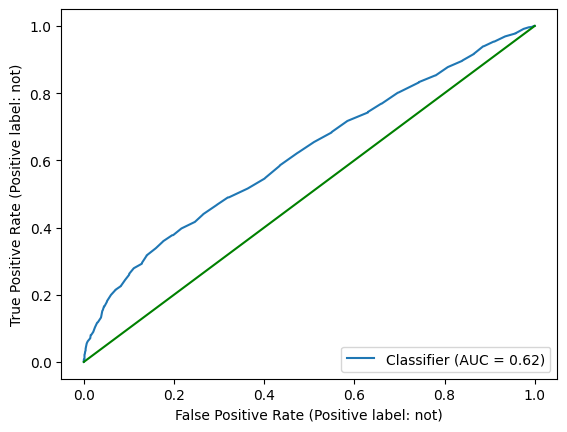

In [31]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test_log,
                                 probabilities_log[categories_log[0]],
                                 pos_label=categories_log[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')
plt.rc("figure", figsize=(10, 5))

The AUC show that the model has a chance of 62% of identifying if a victim has exhibited signs of mental illness or not.

## Random Forest and Decision tree

Finally my last question is based on predictors like gender, race, armed, and threat level, flee status can we predict if the victim has exhibited signs of mental illness?

Just as the the flee_status I need to check if there no rare class problem in the was_mental_illness_related feature. 

In [32]:
target_2 = "was_mental_illness_related"
predictors_2 = ["threat_type", "flee_status", "armed_with","age", "gender", "race","race_source"]

In [33]:
fatal_police_shootings.was_mental_illness_related.value_counts()

was_mental_illness_related
False    7648
True     1907
Name: count, dtype: int64

There is a big difference between the victims that have exhibited signs of mental illness(true)and those who did not(false). I need to oversample the victims that have exhibited signs of mental illness(True) to be be same as those who did not(False)

In [34]:
# Get two groups in the was_mental_illness_related column
was_mental_illness_related_false = fatal_police_shootings[fatal_police_shootings.was_mental_illness_related == "False"]
was_mental_illness_related_true =  fatal_police_shootings[fatal_police_shootings.was_mental_illness_related == "True"]

In [35]:
was_mental_illness_related_true

id        date   threat_type flee_status    armed_with   
0         3  2015-01-02         point         not           gun  \
3         8  2015-01-04         point         not       replica   
12       22  2015-01-07        threat         not         knife   
21       42  2015-01-11         point         not           gun   
25       48  2015-01-13        threat         not         knife   
...     ...         ...           ...         ...           ...   
9522  10299  2024-04-04          move         not         knife   
9524  10301  2024-04-04         point         not           gun   
9534  10315  2024-04-09          move         not         knife   
9542  10329  2024-04-11  undetermined         not  undetermined   
9545  10322  2024-04-12         point         not           gun   

               city state location_precision                            name   
0           Shelton    WA      not_available                      Tim Elliot  \
3     San Francisco    CA      not_available                 Matthew Hoffman   
12         Columbus    OH      not_available  Hashim Hanif Ibn Abdul-Rasheed   
21           Arcola    IL      not_available                     Tommy Smith   
25       Jourdanton    TX      not_available               Richard McClendon   
...             ...   ...                ...                             ...   
9522         Martin    TN              block                   Bobby Dickens   
9524         Tucson    AZ              block                     Jacob Dryer   
9534   North Vernon    IN       intersection                    Rachel Blake   
9542        El Paso    TX              block                  Martin Herrera   
9545         Warren    MI       intersection                             NaN   

       age  gender race    race_source was_mental_illness_related body_camera  
0     53.0    male    A  not_available                       True       False  
3     32.0    male    W  not_available                       True       False  
12    41.0    male    B  not_available                       True       False  
21    39.0    male    W  not_available                       True       False  
25    43.0    male    W  not_available                       True       False  
...    ...     ...  ...            ...                        ...         ...  
9522  44.0    male    W          photo                       True       False  
9524  27.0    male  NaN            NaN                       True       False  
9534  23.0  female    W          photo                       True       False  
9542  27.0    male    H          photo                       True       False  
9545  18.0    male    A           clip                       True        True  

[1907 rows x 15 columns]

In [36]:
#oversampling all the true category in the was_mental_illness_related to have 7648 to balance the classes in the was_mental_illness_related category
was_mental_illness_related_true_sample= was_mental_illness_related_true.sample(n=7648, replace = True)
oversampled = pd.concat([was_mental_illness_related_true_sample, was_mental_illness_related_false])
oversampled


id        date   threat_type flee_status    armed_with   
2317   2575  2017-05-12         point         not           gun  \
7322   7943  2022-04-16        threat         NaN         knife   
6360   6888  2021-05-23        attack         not       unarmed   
2670   2972  2017-09-21        threat         not         knife   
1184   1353  2016-03-10         point         not           gun   
...     ...         ...           ...         ...           ...   
9550  10326  2024-04-13  undetermined         NaN  undetermined   
9551  10327  2024-04-13         shoot         yes           gun   
9552  10328  2024-04-13         point         NaN           gun   
9553  10325  2024-04-14         shoot         yes           gun   
9554  10339  2024-04-14         shoot         yes           gun   

                   city state location_precision                        name   
2317           Billings    MT      not_available                 Ryan Lowell  \
7322         Las Cruces    NM      not_available                 Amelia Baca   
6360  Williams Township    PA      not_available        Edward James Shadder   
2670             Tacoma    WA      not_available               Matthew Wells   
1184             Odessa    TX      not_available                Jason Meador   
...                 ...   ...                ...                         ...   
9550             Durand    MI              block               Daniel Silver   
9551   Henderson County    NC                NaN          Hayden Elias Brook   
9552              Pampa    TX              block  Ezekiel Adell Carl Jackson   
9553            Houston    TX       intersection               Patrick Hurst   
9554           Syracuse    NY            address       Christopher R. Murphy   

       age  gender race    race_source was_mental_illness_related body_camera  
2317  30.0    male    W  not_available                       True       False  
7322  75.0  female    H          photo                       True        True  
6360  55.0    male    W  not_available                       True       False  
2670  40.0    male    W  not_available                       True       False  
1184  50.0    male    W  not_available                       True       False  
...    ...     ...  ...            ...                        ...         ...  
9550  43.0    male    W          photo                      False       False  
9551  29.0    male    W          photo                      False       False  
9552  25.0    male    B  public_record                      False        True  
9553  47.0    male    B  public_record                      False       False  
9554  33.0    male    W          photo                      False       False  

[15296 rows x 15 columns]

In [37]:
oversampled.was_mental_illness_related.value_counts()

was_mental_illness_related
True     7648
False    7648
Name: count, dtype: int64

In [38]:
oversampled = oversampled.dropna(subset=predictors_2)
X = pd.get_dummies(oversampled[predictors_2], drop_first=True)
y = oversampled[target_2]
# The train_test_split() function will create 4 variables
X_train, X_test, y_train, y_test = train_test_split(
    X, # The first argument is the X variable
    y, # The second argument is the Y variable
    test_size=0.4, # Proportion of the data in the test set
    random_state=0)
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                              max_leaf_nodes=10
                                             )
decision_tree_model = decision_tree_model.fit(X_train,y_train)
decision_tree_model

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [39]:
categories=decision_tree_model.classes_
categories

array(['False', 'True'], dtype=object)

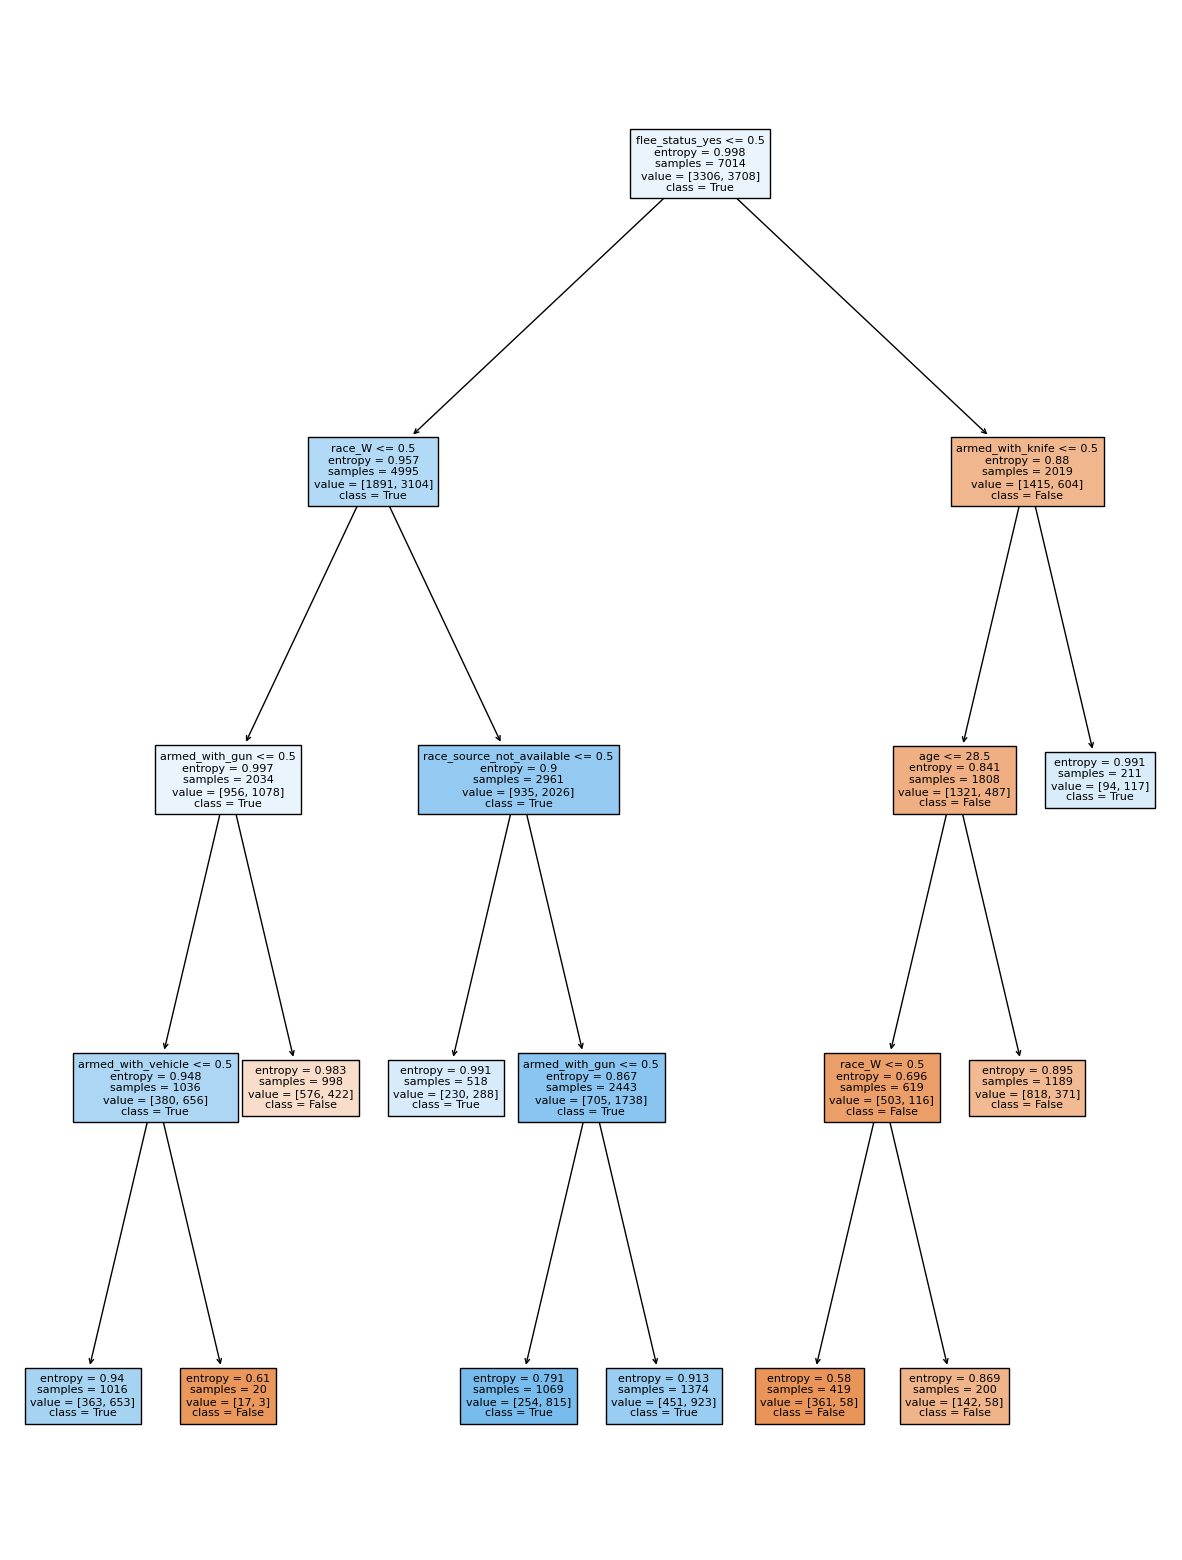

In [57]:
plot_tree(decision_tree_model, feature_names=X_train.columns,fontsize=8,filled=True,class_names=categories
         )
plt.rc("figure", figsize=(10, 20))
plt.show()

The tree show that the most important predictors are the flee_status not category, people armed with a knife in the armed category and white individuals in the race category. Futhermore the model also use race_source as one of the most important predictor, specifically it public record category and  the race_source not available category.

In [41]:
random_Forest_model = RandomForestClassifier(criterion="gini",
                                              max_leaf_nodes=10,
                                             random_state=42
                                         
                                             
                                             )
random_Forest_model = random_Forest_model.fit(X_train,y_train)
random_Forest_model

RandomForestClassifier(max_leaf_nodes=10, random_state=42)

In [42]:
# Get both probabilities and predictions!
probabilities = random_Forest_model.predict_proba(X_test)
probabilities = pd.DataFrame(probabilities, columns = categories)
categories=random_Forest_model.classes_
predictions = random_Forest_model.predict(X_test)

In [43]:
importances=random_Forest_model.feature_importances_#assign the features importance to the importances variable

In [44]:
#create a dataframe feature_importance displaying the array of features importances and their features then sort them in ascending order while reseting the index
feature_importance = pd.DataFrame({
    'Feature': X_test.columns ,
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance

Feature  Importance
0                        flee_status_yes    0.325609
1                                 race_W    0.114290
2                       armed_with_knife    0.103842
3                         armed_with_gun    0.072591
4                                    age    0.059277
5                                 race_B    0.052264
6                     armed_with_vehicle    0.051700
7                      threat_type_shoot    0.046700
8              race_source_not_available    0.041172
9              race_source_public_record    0.024433
10                    threat_type_threat    0.021547
11                    armed_with_replica    0.019750
12                     threat_type_point    0.018342
13                                race_H    0.018233
14              threat_type_undetermined    0.004934
15                      threat_type_flee    0.004815
16                     race_source_photo    0.003612
17                           gender_male    0.003530
18                    threat_type_attack    0.002981
19               armed_with_undetermined    0.002957
20                    armed_with_unknown    0.001698
21                    armed_with_unarmed    0.001600
22                armed_with_vehicle;gun    0.001217
23                      threat_type_move    0.001151
24                armed_with_gun;vehicle    0.000697
25                  armed_with_gun;knife    0.000302
26                      armed_with_other    0.000271
27                armed_with_knife;knife    0.000197
28                                race_N    0.000159
29         armed_with_knife;blunt_object    0.000130
30                              race_N;H    0.000000
31                     race_source_other    0.000000
32                            race_W;B;N    0.000000
33                              race_W;B    0.000000
34                                race_O    0.000000
35         armed_with_blunt_object;knife    0.000000
36                              race_B;H    0.000000
37                     gender_non-binary    0.000000
38        armed_with_vehicle;knife;other    0.000000
39  armed_with_blunt_object;blunt_object    0.000000
40            armed_with_replica;vehicle    0.000000
41                  armed_with_other;gun    0.000000
42              armed_with_knife;vehicle    0.000000
43              armed_with_vehicle;knife    0.000000

The feature importance show that flee_status_not is the feature that is the most significant predictor in the model followed by armed_with_knife and race_W which are the same features that the decision trees showes as the most important but we also have flee_status_foot feature that driving the prediction of the random forest.  This show that the model thinks that people who did not flee have most likely exhibited signs of mental illness, also the model associated people that are armed with a knife to people that have exhibited signs of mental illness. I don't know if we can say that the model identify people that are white as being more prone exhibit signs of mental illness, considering that they are the most represented in the race category. the model might pick on patterns related to other important features like armed with a knife. If the majority of people that are armed with a knife are white the model might consider it as an important predictor. 

In [45]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat,index=categories,columns=categories)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text


alt.LayerChart(...)

The confusion matrix show that the model: 
    
-predicted the False category 1261 times when there was no mental illness exhibited by the victims and the True category 1875 time when there was mental illness exhibited by the victims correctly.

-predicted 990 times True when it was False( when there was no mental illness exhibited by the victims) and predicted False 551 times when it was True(when there was mental illness exhibited by the victims).

After oversampling, the model have learn to better identified the True cases but at the cost of incorrectly classifying the false cases. 

In [46]:
# You must use print to make this readable
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.70      0.56      0.62      2251
        True       0.65      0.77      0.71      2426

    accuracy                           0.67      4677
   macro avg       0.68      0.67      0.66      4677
weighted avg       0.67      0.67      0.67      4677



The precision of False is 70% and for True it is 65% which means that the model is correct 70% of time when predicting False and 65% times when predicting True.

The recall for False is 56% and for True it is 77% which mean that the model correctly identifies 76% of true cases where victims of fatal shootings actually exhibited mental illness but a recall of 56% show the drop in performance of the model because it can only identify 56% of people that did not exhibit sighs of mental illness.

The overall accuracy of the model is 67% which means that the model can accurately predict 67% of the time if a victims of fatal police shooting exhibited signs of mental illness. 

In [47]:
scores = cross_val_score(random_Forest_model, X, y, cv=5)
print(f"{scores.mean():.2} accuracy with standard deviation {scores.std():.2}")

0.62 accuracy with standard deviation 0.059


The 5 fold cross validation show an accuracy of 62% with a standard deviation of 5.9% which shows that there is not much variation in the accuracy performance of the model and the model can be used with a different dataset.

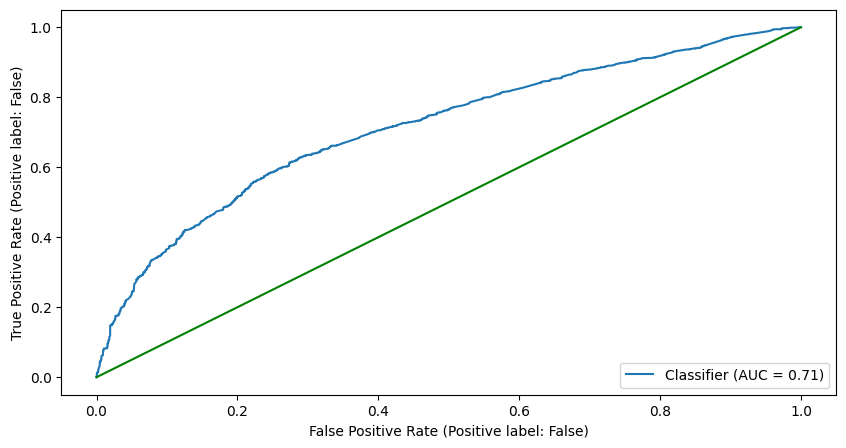

In [61]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])



# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')
#similar to a graph of specificity over recall but is only used for binary classifiers. 
plt.rc("figure", figsize=(10, 10))

The AUC show that the model has a chance of 71% of identifying if a victim has exhibited signs of mental illness or not.

## Conclusion

Overall, there are clear trends in the demographics and circumstances of these police fatal incident that come to light from my research of the Washington Post data on fatal police shootings. The data reveals a notable disparity in gender, with male victims being far more prevalent than female or non-binary victims. This discrepancy makes analysis challenging, especially since there isn't much representation of non-binary people, which makes it hard to draw reliable conclusion. My Random Forest and Logistic Regression models provide insight into the correlations between factors like age, gender, and the chance that victims may run during a police confrontation. The primary conclusion is that during a police confrontation, younger people and men are more likely to run away than older people and women. Furthermore, data indicates that quite a few of the victims appeared to be mentally ill. According to a study conducted by the [Johns Hopkins Center for Gun Violence Solutions](https://publichealth.jhu.edu/2024/study-of-fatal-and-nonfatal-shootings-by-police-reveals-racial-disparities-dispatch-risks), people going through mental or behavioral health crises were engaged in roughly 23% of police shootings, and these incidents had a higher chance of ending in fatalities. In addition, the same study discovered that most victims of police shootings were armed, with guns being the most often used weapon. These findings corroborate my findings about the frequency of armed victims in encounters that end in death.

Despite these discoveries, there are some problems with the dataset. The dataset's reliance on publicly available information, combined with its inherent class imbalance, limits the performance, the generalizability and the robustness of my models. The considerable underrepresentation of non-binary victims complicates the findings. Future data analysts and collectors should aim on increasing the data's inclusivity and completeness. This involves improving the representation of all demographic groups and increasing the accuracy of contextual information around each incidence. 

Crifasi, Cassandra, et al. "Study of Fatal and Nonfatal Shootings by Police Reveals Racial Disparities, Dispatch Risks." Johns Hopkins Bloomberg School of Public Health, 15 Mar. 2024, [publichealth.jhu.edu/2024/study-of-fatal-and-nonfatal-shootings-by-police-reveals-racial-disparities-dispatch-risks.](https://publichealth.jhu.edu/2024/study-of-fatal-and-nonfatal-shootings-by-police-reveals-racial-disparities-dispatch-risks)